# Caracterización base de datos Aspirantes y Admitidos
**Entrega #2**

[Enlace Base de Datos](https://www.datos.gov.co/Educaci-n/Microdatos-Aspirantes-y-Admitidos-en-la-UNAL/mqpd-2jhs/about_data)

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
!wget --header='Host: drive.usercontent.google.com' --header='User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8' --header='Accept-Language: es-ES,es;q=0.8' --header='Cookie: SOCS=CAISNQgQEitib3FfaWRlbnRpdHlmcm9udGVuZHVpc2VydmVyXzIwMjQwNTE0LjA2X3AwGgJmaSADGgYIgOu0sgY; OSID=g.a000sAjc_Cjxwr90_6CntXl3Ni0H0e7VEF6q5bmeRhUT0wNyvfrkwc4ZRBypMASUagrMYTBAAwACgYKAfISARUSFQHGX2MibtQvDTEDlJmMD8NfcbJxehoVAUF8yKrskiR0wPMPw2JDyJYZ47650076; __Secure-OSID=g.a000sAjc_Cjxwr90_6CntXl3Ni0H0e7VEF6q5bmeRhUT0wNyvfrkONwuSEu_MvFoKwARLPJ20gACgYKAesSARUSFQHGX2MiYMahBDWNEIW41FhYCmWdMxoVAUF8yKog_yoX4Rwb0SDqgTh3teUV0076; AEC=AVcja2cxsQarQuZrNVAcgQE1gAqBkk44vJPj2NmTtsXECGlZT0HWRIiTnQ; SID=g.a000tAjc_AcBIxA8ZZN4W0kcBtGTFT4cbmr6wFVx_YPf9PA83UV5-1khPrdZy9oeOHgUZqEZygACgYKAQwSARUSFQHGX2MizuhmRvylGePjWRdHGSyDWBoVAUF8yKrgZq06A50Sx_m7wmiDtnI-0076; __Secure-1PSID=g.a000tAjc_AcBIxA8ZZN4W0kcBtGTFT4cbmr6wFVx_YPf9PA83UV53j-XPzQkgdTkv7vhvqpo_gACgYKAcYSARUSFQHGX2Miss4fv0weLOy23KcrnRKLWhoVAUF8yKqdOPz3I7rRfoXHibfWFwwx0076; __Secure-3PSID=g.a000tAjc_AcBIxA8ZZN4W0kcBtGTFT4cbmr6wFVx_YPf9PA83UV5Jw4jpUjHmAJ3GeQftVk77wACgYKAZsSARUSFQHGX2MiBYWA4b-5o8Y9m6mDLp4FbBoVAUF8yKrKdyL9VCpbDjt5OWQ1mo4k0076; HSID=ApCULj_apEem6aTEs; SSID=AGqMUSkabB438NKll; APISID=6cxX5beCEU7jdMDX/AWOvijI96Dwiit3tu; SAPISID=Ax7ljMYtQQJ7dlIc/Ad4s_jEBa-nmfME0b; __Secure-1PAPISID=Ax7ljMYtQQJ7dlIc/Ad4s_jEBa-nmfME0b; __Secure-3PAPISID=Ax7ljMYtQQJ7dlIc/Ad4s_jEBa-nmfME0b; NID=521=x4wqkoUJ3XFXbM9R-hdlx5y2yX8CA_YhH_T_SHI4eQRF-wRj3by5iaDXWWrcHOAIyfUeXTUbrA9BVQEWrN7LVauuWZLJ-osdlUtkE3joLohrdgqQR-0-7uokxqWmyTEnilSUv7S5EsCF7AAmnCNN1P9QalZ4giB1dpJBkQB7Vpp_MMG2Y_Mu0x8wWVfI1OLC_Vg6mhG9THnByW402pZXw3tsUl1WXALy2eJgPYjZm0ckYFnO1guc5KgBdCuuAOIp-jn7-jz0qBa1_vomgn6XKTzNk32dPrVlp1_GDqfZdCQhi3RvQiawjCQ40TF6AZvy_1BWSRLNtnu10T_GOKD5tsz4FZqa8WFqSAfFniUG6VNo5kK-Bo1b44pl8eJ22LbBJyeJ59c6KOpsF9FrNIhnqXTWhEopnORtXC2CIrRb4zubKnN7suwnTiqhN96_ZICKNVuhHZYLfg83V4AnwyPq0-xXSwSn1Bsvp8oeXtiUtmGP0NUjLyqadFnT-4x63LTvOq6LVrgxKcwA5Ao76uHmV82mfmXgIYyWAN1GfD1JmA40Fo6rPp9Bh8z8NSgdkPaNphCMReohTHLgAqGaLKCBuNXJqINktSq3pTDqOKB_SdKEiYhwp0SAsUruRTyhhD0FvgNujf9OzXgJ2sF3xcioF9jWUGKe0YyuLrJK8W1-NFGLZVWZqk0goGZ4OlqroY4p3JrtBh-WgQAa1RkWrAlSsDN7QrPz6Nv5Q5bTAIuF6mIpotDzH41EnDqVsaAy2SsQw-0WItk0mNdZQbTUk4Xs_r6ZCHQmXknSLgTpkN4lHSAOqFAj2Pvr; __Secure-1PSIDTS=sidts-CjEBmiPuTTnzvBCtQazfMjUzqwUq0796xAZD15CsAu0Jt8OENWeO5KClQYELCX9SGAMZEAA; __Secure-3PSIDTS=sidts-CjEBmiPuTTnzvBCtQazfMjUzqwUq0796xAZD15CsAu0Jt8OENWeO5KClQYELCX9SGAMZEAA; SIDCC=AKEyXzXPmI1B7ZGbOdIp_1y25h7X-jP-2444ULcHsoN2N7avCR_tIU_oFTV8rc28gQ9-MyJjA1Y; __Secure-1PSIDCC=AKEyXzX4qX_eepoJqMzDTDKU_KTPaf3Xc9cvdTTX0sBUD4pI__jcKPDPGVgG0l5agA9-7aVL1x8; __Secure-3PSIDCC=AKEyXzU2GdhCH3kUTkFVC81cEpkGWo9in4YYwXiecWCq6lN5hF_LXVgGPdYJ62x4sjI0AU5Kwk0' --header='Connection: keep-alive' 'https://drive.usercontent.google.com/download?id=1D5P4ZK8uexsb_fVCBhrZ4xaH_oG_GT33&export=download&authuser=3&confirm=t&uuid=608236ce-1992-4420-b55f-5509d82670b7&at=AIrpjvPmuF2Gqo6qAnp0_-SwIgMu:1738641727879' -c -O 'Microdatos_Aspirantes_y_Admitidos.csv'

--2025-02-07 22:08:46--  https://drive.usercontent.google.com/download?id=1D5P4ZK8uexsb_fVCBhrZ4xaH_oG_GT33&export=download&authuser=3&confirm=t&uuid=608236ce-1992-4420-b55f-5509d82670b7&at=AIrpjvPmuF2Gqo6qAnp0_-SwIgMu:1738641727879
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.11.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192921692 (184M) [application/octet-stream]
Saving to: ‘Microdatos_Aspirantes_y_Admitidos.csv’

Microdatos_Aspirant 100%[===================>] 183.98M   142MB/s    in 1.3s    

2025-02-07 22:08:49 (142 MB/s) - ‘Microdatos_Aspirantes_y_Admitidos.csv’ saved [192921692/192921692]



In [3]:
data = pd.read_csv('./Microdatos_Aspirantes_y_Admitidos.csv')

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,COD_DEP_NAC,CIU_NAC,COD_CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_RES,COD_DEP_RES,CIU_RES,COD_CIU_RES,LON_CIU_RES,LAT_CIU_RES,CODS_NAC,CODN_NAC,NACIONALIDAD,EDAD,SEXO,ESTRATO,DISCAPACIDAD,TIPO_DISC,MOD_INS,TIPO_INS,PAES,PEAMA,SNIES_SEDE,INS_SEDE_NOMBRE,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
0,2019,1,Pregrado,Pregrado,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,COL,170,Colombiana,38,Mujeres,ND/NE,No,No aplica,Especial,PAES,Comunidades indígenas,No aplica,-88,Universidad,362.084,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
1,2019,1,Pregrado,Pregrado,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,COL,170,Colombiana,42,Hombres,ND/NE,No,No aplica,Especial,PAES,Comunidades indígenas,No aplica,-88,Universidad,0.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
2,2019,1,Pregrado,Pregrado,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,COL,170,Colombiana,42,Mujeres,ND/NE,No,No aplica,Especial,PEAMA,No aplica,PEAMA - Amazonía,1125,Amazonía,0.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
3,2019,1,Pregrado,Pregrado,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,COL,170,Colombiana,36,Hombres,ND/NE,No,No aplica,Especial,PEAMA,No aplica,PEAMA - Amazonía,1125,Amazonía,483.477,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
4,2019,1,Pregrado,Pregrado,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,AMAZONAS,91,EL ENCANTO,91263,-72.724006,-2.008623,COL,170,Colombiana,35,Hombres,ND/NE,No,No aplica,Especial,PAES,Comunidades indígenas,No aplica,-88,Universidad,455.612,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica


Observe que hay un total de 40 atributos en la base de datos: todos con un total de 556827 registros.

- **YEAR:**
Año de disponibilidad de los datos - disponible desde el año 2018
- **SEMESTRE:**
Semestre de disponibilidad de los datos
- **TIPO_NIVEL:**
Tipo de nivel de formación en la UNAL de los aspirantes (Pregrado y Postgrado))
- **NIVEL:**
Nivel de formación al que se inscribieron los aspirantes
- **DEP_NAC:**
Nombre del departamento de nacimiento de los aspirantes a la UNAL
- **COD_DEP_NAC:**
Código DIVIPOLA del departamento de nacimiento de los aspirantes a la UNAL
- **CIU_NAC:**
Nombre del municipio de nacimiento de los aspirantes a la UNAL
- **COD_CIU_NAC:**
Código DIVIPOLA del municipio de nacimiento de los aspirantes a la UNAL
- **LON_CIU_NAC:**
Longitud del municipio de nacimiento de los aspirantes a la UNAL
- **LAT_CIU_NAC:** Latitud del municipio de nacimiento de los aspirantes a la UNAL
- **DEP_RES:**
Nombre del departamento de procedencia de los aspirantes a la UNAL
- **COD_DEP_RES:**
Código DIVIPOLA del departamento de procedencia de los aspirantes a la UNAL
- **CIU_RES:**
Nombre del municipio de procedencia de los aspirantes a la UNAL
- **COD_CIU_RES:**
Código DIVIPOLA del municipio de procedencia de los aspirantes a la UNAL
- **LON_CIU_RES:**
Longitud del municipio de procedencia de los aspirantes a la UNAL
- **LAT_CIU_RES**
Latitud del municipio de procedencia de los aspirantes a la UNAL
- **CODS_NAC:**
Código Alpha 3 ISO 3166 del país de nacimiento de los aspirantes a la UNAL
- **CODN_NAC:**
Código Numérico ISO 3166 del país de nacimiento de los aspirantes a la UNAL
- **NACIONALIDAD:**
Nacionalidad de los aspirantes a la UNAL
- **EDAD:**
Edad (en años) de los aspirantes a la UNAL
- **SEXO:**
Sexo de los aspirantes a la UNAL
- **ESTRATO:**
Estrato socioeconómico de los aspirantes a la UNAL
- **DISCAPACIDAD:**
¿El aspirante a la UNAL presenta alguna discapacidad?
- **TIPO_DISC:**
Tipo de discapacidad de los aspirantes que presentan esta condición en la UNAL
- **MOD_INS:**
Modalidad de inscripción de los aspirantes a la UNAL (Especial y Regular)
- **TIPO_INS:**
Tipo de inscripción de los aspirantes a la UNAL (Regular, PAES y PEAMA)
- **PAES:**
Modalidades de inscripción del programa PAES de la UNAL (aplica para pregrado)
- **PEAMA:**
Modalidades de inscripción del programa PEAMA de la UNAL (aplica para pregrado)
- **SNIES_SEDE:**
Código SNIES de la Sede en la que se inscribió el aspirante a la UNAL
- **INS_SEDE_NOMBRE:**
Nombre de la Sede en la que se inscribió el aspirante a la UNAL
- **PTOTAL:**
Puntaje obtenido por el aspirante en la prueba de admisión a la UNAL (difiere entre pregrado y postgrado)
- **ADMITIDO:**
¿El aspirante fue admitido a la UNAL?
- **SNIES_PROGRA:**
Código SNIES del programa al que se inscribió (POS) y se admitió (PRE y POST) el aspirante a la UNAL
- **PROGRAMA:**
Nombre del programa al que se inscribió (POS) y se admitió (PRE y POST) el aspirante a la UNAL
- **AREAC_SNIES:**
Área del Conocimiento SNIES al que pertenecen los programas académicos
- **CA_CINE:**
Código amplio del Área de Conocimiento CINE a la que pertenece el programa académico
- **CD_CINE:**
Código detallado del Área de Conocimiento CINE a la que pertenece el programa académico
- **AREA_CINE**
Área del Conocimiento CINE a la que pertenecen los programas académicos
- **MODALIDAD:**
Modalidad de formación en pregrado de los aspirantes a postgrado en la UNAL (aplica para postgrado)
- **RANGO_ANO_TERMINACION**
Duración, desde el último grado de formación obtenido hasta la inscipción en la UNAL, de los aspirantes a postgrado (aplica para postgrado)

## Agrupación de atributos

In [ ]:
def group_atts(columns, title):
  n = (70 - len(title))//2
  print("="*n + f" {title} " + "="*n)
  for col in columns:
    if col in data.columns:
        print(f"\nValores únicos en '{col}':")
        print(data[col].unique())
    else:
        print(f"\nLa columna '{col}' no existe en el DataFrame.")
  print("="*72)


### 1. Información de procedencia del aspirante

- **DEP_NAC**
- **COD_DEP_NAC**
- **CIU_NAC**
- **COD_CIU_NAC**
- **LON_CIU_NAC**
- **LAT_CIU_NAC**
- **DEP_RES**
- **COD_DEP_RES**
- **CIU_RES**
- **COD_CIU_RES**
- **LON_CIU_RES**
- **LAT_CIU_RE**
- **CODS_NAC**
- **CODN_NAC**
- **NACIONALIDAD**



In [ ]:
group_atts(['DEP_NAC', 'COD_DEP_NAC'], 'Departamento de Nacimiento')

====================== Departamento de Nacimiento ======================

Valores únicos en 'DEP_NAC':
['AMAZONAS' 'DPTO EXTRANJERO' 'ANTIOQUIA' 'ARAUCA' 'BOGOTÁ, D. C.'
 'ATLÁNTICO' 'BOLÍVAR' 'BOYACÁ' 'CALDAS' 'CAQUETÁ' 'CASANARE' 'CAUCA'
 'CESAR' 'CHOCÓ' 'CÓRDOBA' 'CUNDINAMARCA' 'GUAINÍA' 'LA GUAJIRA'
 'GUAVIARE' 'HUILA' 'MAGDALENA' 'META' 'NARIÑO' 'NORTE DE SANTANDER'
 'PUTUMAYO' 'QUINDÍO' 'RISARALDA' 'SANTANDER'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'SUCRE'
 'TOLIMA' 'VALLE DEL CAUCA' 'VAUPÉS' 'VICHADA' 'Sin información'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y' 'BOGOTÁ D.C.']

Valores únicos en 'COD_DEP_NAC':
[ 91 -89   5  81  11   8  13  15  17  18  85  19  20  27  23  25  94  44
  95  41  47  50  52  54  86  63  66  68  88  70  73  76  97  99]


In [ ]:
group_atts(['CIU_NAC', 'COD_CIU_NAC', 'LON_CIU_NAC', 'LAT_CIU_NAC'], 'Municipio de Nacimiento')

======================= Municipio de Nacimiento =======================

Valores únicos en 'CIU_NAC':
['EL ENCANTO' 'LA CHORRERA' 'LA PEDRERA' ... 'MORICHAL' 'VETAS'
 'ANZÓATEGUI']

Valores únicos en 'COD_CIU_NAC':
[91263 91405 91407 ... 54680 94888 68867]

Valores únicos en 'LON_CIU_NAC':
[-72.72400586 -72.75882534 -70.0353954  ... -76.99022412 -76.69453949
 -68.14550437]

Valores únicos en 'LAT_CIU_NAC':
[-2.00862306 -1.24236415 -1.43237344 ...  7.01897208  6.02640125
  5.83501991]


In [ ]:
group_atts(['DEP_RES', 'COD_DEP_RES'], 'Departamento de Residencia')

====================== Departamento de Residencia ======================

Valores únicos en 'DEP_RES':
['AMAZONAS' 'ANTIOQUIA' 'CALDAS' 'PUTUMAYO' 'BOGOTÁ, D. C.' 'META'
 'ATLÁNTICO' 'BOLÍVAR' 'CESAR' 'CUNDINAMARCA' 'GUAINÍA' 'TOLIMA'
 'VALLE DEL CAUCA' 'ARAUCA' 'BOYACÁ' 'CAQUETÁ' 'CASANARE' 'CÓRDOBA'
 'DPTO EXTRANJERO' 'LA GUAJIRA' 'HUILA' 'NARIÑO' 'NORTE DE SANTANDER'
 'QUINDÍO' 'RISARALDA'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'SANTANDER'
 'GUAVIARE' 'CAUCA' 'CHOCÓ' 'SUCRE' 'VAUPÉS' 'MAGDALENA' 'VICHADA'
 'Sin información' 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y'
 'BOGOTÁ D.C.']

Valores únicos en 'COD_DEP_RES':
[ 91   5  17  86  11  50   8  13  20  25  94  73  76  81  15  18  85  23
 -89  44  41  52  54  63  66  88  68  95  19  27  70  97  47  99]


In [ ]:
group_atts(['CIU_RES', 'COD_CIU_RES', 'LON_CIU_RES', 'LAT_CIU_RES'], 'Municipio de Residencia')

======================= Municipio de Residencia =======================

Valores únicos en 'CIU_RES':
['EL ENCANTO' 'LA CHORRERA' 'LETICIA' ... 'MEDIO BAUDÓ' 'RÍO QUITO'
 'JURADÓ']

Valores únicos en 'COD_CIU_RES':
[91263 91405 91001 ... 27430 27600 27372]

Valores únicos en 'LON_CIU_RES':
[-72.72400586 -72.75882534 -69.94067983 ... -76.73924427 -77.7646171
 -76.99022412]

Valores únicos en 'LAT_CIU_RES':
[-2.00862306 -1.24236415 -4.21202317 ...  5.48344068  7.1060396
  7.01897208]


In [ ]:
group_atts(['CODS_NAC', 'CODN_NAC', 'NACIONALIDAD'], 'País de Nacimiento')

========================== País de Nacimiento ==========================

Valores únicos en 'CODS_NAC':
['COL' 'PER' 'HND' 'VEN' 'ARG' 'USA' 'CRI' 'DEU' 'CAN' 'ECU' 'ESP' 'ITA'
 'BRA' 'BOL' 'CHL' 'NOR' 'MEX' 'ISR' 'GTM' 'GBR' 'CUB' 'CHN' 'KOR' 'JPN'
 'PAN' 'PRT' 'DOM' 'SLV' 'NLD' 'KEN' 'FRA' 'TUR' 'ERI' 'QAT' 'CUW' 'ALB'
 'AUS' 'SDN' 'AUT' 'COM' 'RUS' 'CYP' 'IND' 'CHE' 'PRY' 'URY' 'BEL' 'POL'
 'BWA' 'SUR' 'PRK' 'CIV' 'BTN' 'MWI' 'CPV' 'BLR' 'TCD' 'NIC' 'AFG' 'ABW'
 'UKR' 'CZE' 'WSM' 'VUT' 'BLZ' 'ROU' 'TKM' 'OMN' 'DZA' 'MMR' 'BFA']

Valores únicos en 'CODN_NAC':
[170 604 340 862  32 840 188 276 124 218 724 380  76  68 152 578 484 376
 320 826 192 156 410 392 591 620 214 222 528 404 250 792 232 634 531   8
  36 729  40 174 643 196 356 756 600 858  56 616  72 740 408 384  64 454
 132 112 148 558   4 533 804 203 882 548  84 642 795 512  12 104 854]

Valores únicos en 'NACIONALIDAD':
['Colombiana' 'Extranjero']


### 2. Información socioeconomica del aspirante
- **SEXO**
- **ESTRATO**
- **DISCAPACIDAD**
- **TIPO_DISC**

In [ ]:
group_atts(['SEXO'], 'Sexo')

================================= Sexo =================================

Valores únicos en 'SEXO':
['Mujeres' 'Hombres' 'Transgénero' 'No binario']


In [ ]:
group_atts(['ESTRATO'], 'Estrato Socioeconómico')

======================== Estrato Socioeconómico ========================

Valores únicos en 'ESTRATO':
['ND/NE' 'Estrato 1' 'Estrato 3' 'Estrato 2' 'Estrato 4' 'Estrato 6'
 'Estrato 5']


In [ ]:
group_atts(['DISCAPACIDAD', 'TIPO_DISC'], 'Discapacidad')

============================= Discapacidad =============================

Valores únicos en 'DISCAPACIDAD':
['No' 'Sí']

Valores únicos en 'TIPO_DISC':
['No aplica' 'Motriz' 'Visual' 'Cognitiva' 'Auditiva' 'Psicosocial'
 'Otras']


### 3. Información de la inscripción
- **TIPO_NIVEL**
- **NIVEL**
- **MOD_INS**
- **TIPO_INS**
- **PAES**
- **PEAMA**
- **SNIES_SEDE**
- **INS_SEDE_NOMBE**
- **PTOTAL**
- **ADMITIDO**
- **SNIES_PROGRA**
- **PROGRAMA**
- **MODALIDAD**

In [ ]:
group_atts(['TIPO_NIVEL', 'NIVEL'], 'Nivel')

================================ Nivel ================================

Valores únicos en 'TIPO_NIVEL':
['Pregrado' 'Postgrado']

Valores únicos en 'NIVEL':
['Pregrado' 'Maestría' 'Especialización' 'Doctorado'
 'Especialidades médicas']


In [ ]:
group_atts(['MOD_INS', 'TIPO_INS', 'PAES', 'PEAMA'], 'Inscripción')

============================= Inscripción =============================

Valores únicos en 'MOD_INS':
['Especial' 'Regular']

Valores únicos en 'TIPO_INS':
['PAES' 'PEAMA' 'Regular' 'PAET']

Valores únicos en 'PAES':
['Comunidades indígenas' 'No aplica'
 'Victimas del conflicto armado interno en Colombia'
 'Población afrocolombiana' 'Mejores bachilleres'
 'Mejores bachilleres de municipios pobres']

Valores únicos en 'PEAMA':
['No aplica' 'PEAMA - Amazonía' 'PEAMA - Orinoquía' 'PEAMA - Tumaco'
 'PEAMA - Caribe' 'PEAMA - Sede Bogotá - Sumapaz']


In [ ]:
group_atts(['SNIES_SEDE', 'INS_SEDE_NOMBRE'], 'Sede de Inscripción')

========================= Sede de Inscripción =========================

Valores únicos en 'SNIES_SEDE':
[ -88 1125 1102 1103 1101 1124 1104 9920 1126 9933]

Valores únicos en 'INS_SEDE_NOMBRE':
['Universidad' 'Amazonía' 'Medellín' 'Manizales' 'Bogotá' 'Orinoquía'
 'Palmira' 'Tumaco' 'Caribe' 'De La Paz']


In [ ]:
group_atts(['PTOTAL', 'ADMITIDO'], 'Puntuación y Admisión')

======================== Puntuación y Admisión ========================

Valores únicos en 'PTOTAL':
[3.62084e+02 0.00000e+00 4.83477e+02 ... 2.70000e-01 1.70000e-01
 6.20000e-01]

Valores únicos en 'ADMITIDO':
['No' 'Sí']


In [ ]:
group_atts(['SNIES_PROGRA', 'PROGRAMA', 'MODALIDAD'], 'Programa de inscripción y modalidad')

================= Programa de inscripción y modalidad =================

Valores únicos en 'SNIES_PROGRA':
[   -88    119      3      7  16895     10     15     13     18  16911
     19   4120  16905  16939 106661     23     24     31   4122  16940
    125  16902    121     14  16925     17  55189    115     25     34
      9  16914   4124    113    129    127     11    116    114  16919
  16926  16920     28   3101     30     29   3140      1     32     35
  16941   4121   4125   4123     12  16916  16938  16924   4126    143
    124    122    128    126  16923    123    118  16922    120    117
     33  16921     21   3103 106654      2 106341     36     37   3102
  16912  16915    144   3104     27  16904   2497     20     16      5
      6      4  54036   3100  16903      8 107447 108082 108086 108084
 108085 108081 108083 110177     90  55133 101797  52746  19860     86
   2503  52742 107445  55142 106956     41  52978 106668  53268  16943
  91335 107166  19908  55144  52753 10283

### 3. Información del programa académico
- **AREAC_SNIES**
- **CA_CINE**
- **CD_CINE**
- **AREA_CIN**

In [ ]:
group_atts(['AREAC_SNIES', 'CA_CINE', 'CD_CINE', 'AREA_CINE'], 'Programa académico')

========================== Programa académico ==========================

Valores únicos en 'AREAC_SNIES':
['No aplica' 'Ingeniería, arquitectura, urbanismo y afines'
 'Agronomía, veterinaria y afines' 'Ciencias de la salud'
 'Economía, administración, contaduría y afines'
 'Ciencias sociales y humanas' 'Matemáticas y ciencias naturales'
 'Bellas artes' 'Ciencias de la educación']

Valores únicos en 'CA_CINE':
[-88   7   8   9   4   2   3   6   5   1]

Valores únicos en 'CD_CINE':
[-88 724 811 913 411 912 923 222 311 413 712 714 613 231 511 713 722 313
 421 732 532 314 541 731 911 213 542 715 215 711 312 915 232 821 533 -89
 841 531 916 612 223 212 211 111 521 721 588 688 412 929 730 539 388 619
 210 219 611 288]

Valores únicos en 'AREA_CINE':
['No aplica' 'Ingeniería, industria y construcción'
 'Agricultura, silvicultura, pesca y veterinaria' 'Salud y bienestar'
 'Administración de empresas y derecho' 'Artes y humanidades'
 'Ciencias sociales, periodismo e información'
 'Tecnologías 

### 4. Información adicional
- **YEAR**
- **SEMESTRE**
- **RANGO_ANO_TERMINACION**

In [ ]:
group_atts(['YEAR', 'SEMESTRE'], 'Año y semestre disponibilidad de los datos')

============== Año y semestre disponibilidad de los datos ==============

Valores únicos en 'YEAR':
[2019 2020 2021 2022 2023 2024]

Valores únicos en 'SEMESTRE':
[1 2]


In [ ]:
group_atts(['RANGO_ANO_TERMINACION'], 'Duración último grado en la UNAL')

=================== Duración último grado en la UNAL ===================

Valores únicos en 'RANGO_ANO_TERMINACION':
['No aplica' 'Recien graduado' '1 año de graduado'
 'Más de 5 años de graduado' '2 a 5 años de graduado' 'Sin información']


## Limpieza de datos
Tendremos que subsanar las siguientes situaciones en la base de datos.

1.   Datos faltantes en algunas celdas.
2.   Columnas irrelevantes para nuestro análisis.
3.   Registros repetidos.
4.   Valores extremos o atípicos en el caso de variables numéricas.
5.   Errores tipográficos en el caso de variables categóricas.



En primer lugar, observemos que no hay datos nulos dentro del DataFrame.

### Datos faltantes

In [ ]:
print(f'Set size: {data.shape}')
data.dropna(inplace=True)
print(f'Set size: {data.shape}')

Set size: (556827, 40)
Set size: (556827, 40)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556827 entries, 0 to 556826
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   556827 non-null  int64  
 1   SEMESTRE               556827 non-null  int64  
 2   TIPO_NIVEL             556827 non-null  object 
 3   NIVEL                  556827 non-null  object 
 4   DEP_NAC                556827 non-null  object 
 5   COD_DEP_NAC            556827 non-null  int64  
 6   CIU_NAC                556827 non-null  object 
 7   COD_CIU_NAC            556827 non-null  int64  
 8   LON_CIU_NAC            556827 non-null  float64
 9   LAT_CIU_NAC            556827 non-null  float64
 10  DEP_RES                556827 non-null  object 
 11  COD_DEP_RES            556827 non-null  int64  
 12  CIU_RES                556827 non-null  object 
 13  COD_CIU_RES            556827 non-null  int64  
 14  LON_CIU_RES            556827 non-nu

### Columnas irrelevantes

Para determinar si una columna es irrelevante tendremos en cuenta los siguientes criterios:
- No contiene información útil para nuestro anális.
- Es una columna categórica pero con un sólo nivel.
- Es una columna numérica pero con un sólo valor o con una desviación estándar cercana a 0.
- Columnas con información redundate.

Las columnas que son candidatas a ser eliminadas en la agrupación de `Información de procedencia` dado que no aportan información relevente son:
- `COD_DEP_NAC`
- `COD_CIU_NAC`
- `COD_DEP_RES`
- `COD_CIU_RES`
- `CODN_NAC`

Otras columnas que son candidatas a ser eliminadas pueden ser `MOD_INS` y `NACIONALIDAD`, dado que podemos determinar los valores de estás columnas mediante las columnas `TIPO_INS` y `CODS_NAC` respectivamente.
Vamos a verificar que no existan inconcistencias entre las columnas mencionadas con la siguiente sentencia.

In [ ]:
data[(data['MOD_INS'] == 'Especial') & (data['TIPO_INS'] == 'Regular')].shape

(0, 40)

In [ ]:
data[(data['MOD_INS'] == 'Regular') & (data['TIPO_INS'] != 'Regular')].shape

(0, 40)

In [ ]:
data[(data['NACIONALIDAD'] == 'Colombiana') & (data['CODS_NAC'] != 'COL')].shape

(100, 40)

In [ ]:
data[(data['NACIONALIDAD'] == 'Extrangera') & (data['CODS_NAC'] == 'COL')].shape

(0, 40)

Como podemos ver no existen inconsitencias entre las columnas `MOD_INS` y `TIPO_INS`. Sin embargo, vemos que existen registros en donde el país de nacimiento es diferente a `COL` pero la `NACIONALIDAD` es Colombiana. Por lo cual, era de esperarse ya que pueden haber personas que nacieron en un país extrajero pero tiene nacinalidad colombiana. En conclusión eliminaremos solamente a `MOD_INS`.

Otra forma de determinar si una columna categórica es irrelevante es determinando si dicha columna tiene un sólo nivel. Teniendo en cuenta lo que hicimos en la sección de agrupación concluimos que no hay columnas que cumplan este criterio.

In [ ]:
cols_cat = data.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna TIPO_NIVEL: 2 subniveles
Columna NIVEL: 5 subniveles
Columna DEP_NAC: 37 subniveles
Columna CIU_NAC: 1029 subniveles
Columna DEP_RES: 37 subniveles
Columna CIU_RES: 1013 subniveles
Columna CODS_NAC: 71 subniveles
Columna NACIONALIDAD: 2 subniveles
Columna SEXO: 4 subniveles
Columna ESTRATO: 7 subniveles
Columna DISCAPACIDAD: 2 subniveles
Columna TIPO_DISC: 7 subniveles
Columna MOD_INS: 2 subniveles
Columna TIPO_INS: 4 subniveles
Columna PAES: 6 subniveles
Columna PEAMA: 6 subniveles
Columna INS_SEDE_NOMBRE: 10 subniveles
Columna ADMITIDO: 2 subniveles
Columna PROGRAMA: 519 subniveles
Columna AREAC_SNIES: 9 subniveles
Columna AREA_CINE: 10 subniveles
Columna MODALIDAD: 4 subniveles
Columna RANGO_ANO_TERMINACION: 6 subniveles


En el caso de las columnas numericas usaremos el método `data.describe()` y verificaremos las desviación estándar de cada columna.

In [ ]:
data.describe()

,YEAR,SEMESTRE,COD_DEP_NAC,COD_CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,COD_DEP_RES,COD_CIU_RES,LON_CIU_RES,LAT_CIU_RES,CODN_NAC,EDAD,SNIES_SEDE,PTOTAL,SNIES_PROGRA,CA_CINE,CD_CINE
count,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000,556827.000000
mean,2021.138549,1.298245,24.323724,25379.158491,-74.726540,3.917823,24.047521,24288.680894,-74.557710,4.721015,175.973925,19.353146,1394.955313,416.228875,4033.078457,-66.792512,75.033536
std,1.700035,0.457488,26.872500,24478.756262,2.045944,9.715429,23.790739,23639.067914,1.491468,3.445596,60.081290,5.774632,1691.745595,216.534185,17038.876800,39.381732,324.193277
min,2019.000000,1.000000,-89.000000,-89.000000,-89.000000,-89.000000,-89.000000,-89.000000,-89.000000,-89.000000,4.000000,-89.000000,-88.000000,-89.000000,-88.000000,-88.000000,-89.000000
25%,2020.000000,1.000000,11.000000,11001.000000,-75.490415,4.624575,11.000000,11001.000000,-75.385219,4.624575,170.000000,17.000000,1101.000000,378.973000,-88.000000,-88.000000,-88.000000
50%,2021.000000,1.000000,11.000000,11001.000000,-74.113919,4.624575,11.000000,11001.000000,-74.113919,4.624575,170.000000,17.000000,1101.000000,477.423000,-88.000000,-88.000000,-88.000000
75%,2023.000000,2.000000,27.000000,27001.000000,-74.113919,5.343571,25.000000,25754.000000,-74.113919,5.057051,170.000000,20.000000,1102.000000,553.174500,-88.000000,-88.000000,-88.000000
max,2024.000000,2.000000,99.000000,99773.000000,-67.006767,13.370124,99.000000,99773.000000,-67.344905,13.370124,882.000000,77.000000,9933.000000,1132.194000,111082.000000,9.000000,929.000000


Observe que las columnas que presentan una desviación estándar menor son `YEAR` y `SEMESTRE`. Sin embargo, estas columnas serán utilizadas en el análisis con lo cual, las mantendremos.

Ahora, procederemos a crear una copia de la base de datos sin las columnas que cumplieron los criterios que fijamos.

In [153]:
data_mod = data.copy()

In [154]:
del_col = ['COD_DEP_NAC','COD_CIU_NAC','COD_DEP_RES','COD_CIU_RES', 'CODN_NAC', 'MOD_INS']

for i in del_col:
  try:
    data_mod.drop(i, axis=1, inplace=True)
  except:
    print(f'La columna {i} no existe en el DataFrame.')

print(data_mod.shape)
data_mod.head()

(556827, 34)


,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_RES,CIU_RES,LON_CIU_RES,LAT_CIU_RES,CODS_NAC,NACIONALIDAD,EDAD,SEXO,ESTRATO,DISCAPACIDAD,TIPO_DISC,TIPO_INS,PAES,PEAMA,SNIES_SEDE,INS_SEDE_NOMBRE,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
0,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,38,Mujeres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,362.084,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
1,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,42,Hombres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,0.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
2,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,42,Mujeres,ND/NE,No,No aplica,PEAMA,No aplica,PEAMA - Amazonía,1125,Amazonía,0.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
3,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,36,Hombres,ND/NE,No,No aplica,PEAMA,No aplica,PEAMA - Amazonía,1125,Amazonía,483.477,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
4,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,35,Hombres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,455.612,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica


De esta manera hemos reducido la dimensionalidad de la base de datos de 40 columnas a 34.

### Filas repetidas

In [155]:
print(f'Set size: {data_mod.shape}')
data_mod.drop_duplicates(inplace=True)
print(f'Set size: {data_mod.shape}')

Set size: (556827, 34)
Set size: (543219, 34)


### *Outliers* en las variables numéricas

En está sección debemos determinar los *outliers* y dependiendo de la variable numérica analizada decidiremos como gestionar dichos registros.

Examinemos el método `data_mod.describe()` y gráficas de cajas y bigotes de las variables numéricas pertinentes.

In [141]:
data_mod.describe()

,YEAR,SEMESTRE,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_RES,LAT_CIU_RES,EDAD,SNIES_SEDE,PTOTAL,SNIES_PROGRA,CA_CINE,CD_CINE
count,543219.000000,543219.000000,543219.000000,543219.000000,543219.000000,543219.000000,543219.000000,543219.000000,543219.000000,543219.000000,543219.000000,543219.000000
mean,2021.151005,1.290124,-74.728423,3.910372,-74.556086,4.728966,19.391494,1383.368218,425.213641,4133.451888,-66.284684,78.903698
std,1.701881,0.453820,2.054350,9.807195,1.490069,3.470704,5.793708,1663.714705,207.727263,17233.200011,39.711429,326.992068
min,2019.000000,1.000000,-89.000000,-89.000000,-89.000000,-89.000000,-89.000000,-88.000000,-89.000000,-88.000000,-88.000000,-89.000000
25%,2020.000000,1.000000,-75.490415,4.624575,-75.408850,4.624575,17.000000,1101.000000,386.534000,-88.000000,-88.000000,-88.000000
50%,2021.000000,1.000000,-74.113919,4.624575,-74.113919,4.624575,18.000000,1101.000000,479.970000,-88.000000,-88.000000,-88.000000
75%,2023.000000,2.000000,-74.113919,5.423953,-74.113919,5.069416,20.000000,1102.000000,554.747000,-88.000000,-88.000000,-88.000000
max,2024.000000,2.000000,-67.006767,13.370124,-67.344905,13.370124,77.000000,9933.000000,1132.194000,111082.000000,9.000000,929.000000


**Observaciones**:
- Notemos que las variables numéricas `SNIES_SEDE`, `SNIES_PROGRA`, `CA_CINE` y `CD_CINE` -las cuales son códigos- poseen valores menores que 0 (en particular su mínimo es -89) solo en el caso en el que el aspirante no haya sido admitido.
- Notemos también que para el caso de las variables `LON_CIU_NAC`, `LON_CIU_RES`, `LAT_CIU_NAC` y `LAT_CIU_RES` sus mínimos también son -89. El análisis del comportamniento de estas variables ya se realizó.

In [55]:
data_mod[(data_mod['LON_CIU_NAC'] == -89) &  (data_mod['LAT_CIU_NAC'] == -89)].shape

(5728, 34)

In [56]:
data_mod[(data_mod['LON_CIU_RES'] == -89) &  (data_mod['LAT_CIU_RES'] == -89)].shape

(525, 34)

In [44]:
data_mod[data_mod['LAT_CIU_NAC'] <= -85].shape

(5728, 34)

In [46]:
data_mod[data_mod['LAT_CIU_RES'] <= -85].shape

(525, 34)

In [ ]:
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

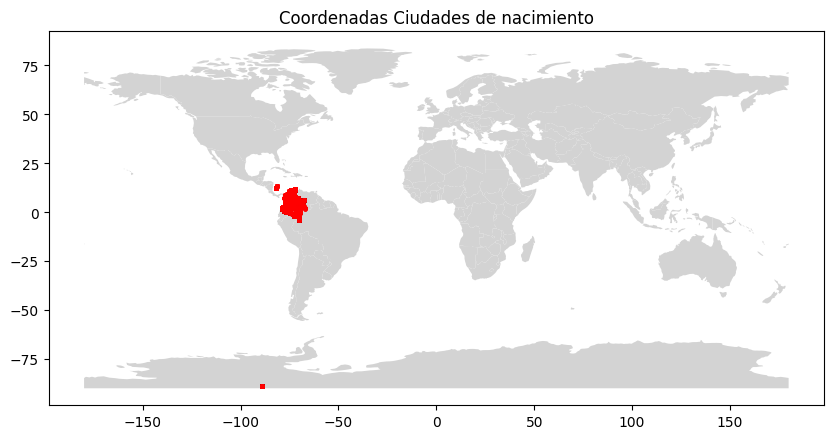

In [142]:
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt

geometry = [Point(xy) for xy in zip(data_mod['LON_CIU_NAC'], data_mod['LAT_CIU_NAC'])]
gdf = gpd.GeoDataFrame(data_mod, geometry=geometry)

# Descargar un mapa base (puedes usar un shapefile o un GeoDataFrame global)
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Graficar
ax = world.plot(color='lightgrey', figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=5)
plt.title("Coordenadas Ciudades de nacimiento")
plt.show()

In [156]:
print(f'Set size: {data_mod.shape}')
data_mod = data_mod[data_mod['LON_CIU_NAC'] != -89]
data_mod = data_mod[data_mod['LON_CIU_RES'] != -89]
data_mod = data_mod[data_mod['LAT_CIU_NAC'] != -89]
data_mod = data_mod[data_mod['LAT_CIU_RES'] != -89]
print(f'Set size: {data_mod.shape}')

Set size: (543219, 34)
Set size: (537339, 34)


In [99]:
data_mod[(data_mod['SNIES_SEDE'] < 0) & (data_mod['ADMITIDO'] == 'Sí')].head()

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_RES,CIU_RES,LON_CIU_RES,LAT_CIU_RES,CODS_NAC,NACIONALIDAD,EDAD,SEXO,ESTRATO,DISCAPACIDAD,TIPO_DISC,TIPO_INS,PAES,PEAMA,SNIES_SEDE,INS_SEDE_NOMBRE,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
76252,2019,2,Pregrado,Pregrado,ANTIOQUIA,CAREPA,-76.653119,7.754204,ANTIOQUIA,CAREPA,-76.653119,7.754204,COL,Colombiana,18,Hombres,Estrato 2,No,No aplica,PAES,Población afrocolombiana,No aplica,-88,Universidad,460.262,Sí,125,Ingeniería administrativa,"Ingeniería, arquitectura, urbanismo y afines",4,413,Administración de empresas y derecho,No aplica,No aplica
76650,2019,2,Pregrado,Pregrado,ANTIOQUIA,ITAGÜÍ,-75.629722,6.168158,PUTUMAYO,SAN FRANCISCO,-76.875892,1.176740,COL,Colombiana,21,Hombres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,517.776,Sí,113,Ingeniería agronómica,"Ingeniería, arquitectura, urbanismo y afines",8,811,"Agricultura, silvicultura, pesca y veterinaria",No aplica,No aplica
79734,2019,2,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,COL,Colombiana,27,Hombres,Estrato 1,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,489.710,Sí,16904,Ingeniería agroindustrial,"Ingeniería, arquitectura, urbanismo y afines",7,-89,"Ingeniería, industria y construcción",No aplica,No aplica
80347,2019,2,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,COL,Colombiana,23,Hombres,Estrato 1,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,486.174,Sí,16903,Diseño industrial,Bellas artes,2,212,Artes y humanidades,No aplica,No aplica
82255,2019,2,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,COL,Colombiana,19,Hombres,Estrato 1,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,574.438,Sí,30,Arquitectura,"Ingeniería, arquitectura, urbanismo y afines",7,731,"Ingeniería, industria y construcción",No aplica,No aplica


In [80]:
data_mod[(data_mod['SNIES_PROGRA'] < 0) & (data_mod['ADMITIDO'] == 'Sí')].shape

(0, 34)

In [77]:
data_mod[(data_mod['CA_CINE'] < 0) & (data_mod['ADMITIDO'] == 'Sí')].shape

(0, 34)

In [100]:
data_mod[(data_mod['CD_CINE'] < 0) & (data_mod['ADMITIDO'] == 'Sí')].head()

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_RES,CIU_RES,LON_CIU_RES,LAT_CIU_RES,CODS_NAC,NACIONALIDAD,EDAD,SEXO,ESTRATO,DISCAPACIDAD,TIPO_DISC,TIPO_INS,PAES,PEAMA,SNIES_SEDE,INS_SEDE_NOMBRE,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
3048,2019,1,Pregrado,Pregrado,ANTIOQUIA,ITUANGO,-75.764167,7.171623,BOYACÁ,TUNJA,-73.354364,5.539371,COL,Colombiana,17,Mujeres,Estrato 2,No,No aplica,Regular,No aplica,No aplica,1101,Bogotá,647.196,Sí,3103,Geografía,Ciencias sociales y humanas,3,-89,"Ciencias sociales, periodismo e información",No aplica,No aplica
6171,2019,1,Pregrado,Pregrado,ANTIOQUIA,MEDELLÍN,-75.577056,6.248941,ANTIOQUIA,MEDELLÍN,-75.577056,6.248941,COL,Colombiana,16,Hombres,Estrato 3,No,No aplica,Regular,No aplica,No aplica,1101,Bogotá,733.576,Sí,106341,Ciencias de la computación,"Ingeniería, arquitectura, urbanismo y afines",6,-89,Tecnologías de la información y la comunicació...,No aplica,No aplica
8294,2019,1,Pregrado,Pregrado,ARAUCA,SARAVENA,-71.873949,6.953878,ARAUCA,ARAUQUITA,-71.427640,7.029314,COL,Colombiana,16,Hombres,Estrato 1,No,No aplica,PEAMA,No aplica,PEAMA - Orinoquía,1124,Orinoquía,520.496,Sí,16904,Ingeniería agroindustrial,"Ingeniería, arquitectura, urbanismo y afines",7,-89,"Ingeniería, industria y construcción",No aplica,No aplica
9382,2019,1,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,COL,Colombiana,38,Mujeres,Estrato 2,No,No aplica,Regular,No aplica,No aplica,1104,Palmira,566.451,Sí,16904,Ingeniería agroindustrial,"Ingeniería, arquitectura, urbanismo y afines",7,-89,"Ingeniería, industria y construcción",No aplica,No aplica
9405,2019,1,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,COL,Colombiana,36,Hombres,Estrato 3,No,No aplica,Regular,No aplica,No aplica,1101,Bogotá,863.121,Sí,106341,Ciencias de la computación,"Ingeniería, arquitectura, urbanismo y afines",6,-89,Tecnologías de la información y la comunicació...,No aplica,No aplica


**Nota:** Solamente analizaremos los diagramas de las variables `EDAD` y `PTOTAL` dado que las demás variables numéricas son códigos o en el caso de `YEAR` y `SEMESTRE`no encontramos *outliers*.

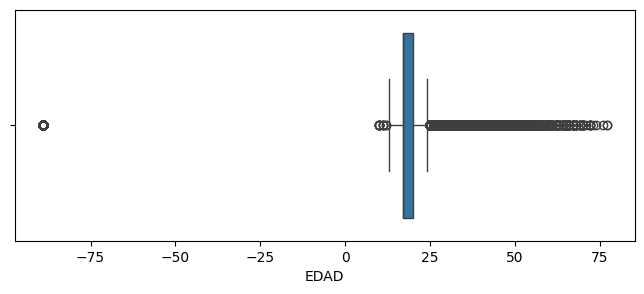

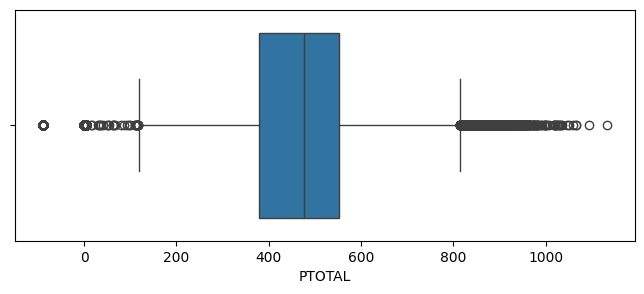

In [ ]:
cols_num = ['EDAD', 'PTOTAL']

plt.rcParams['figure.figsize'] = [8, 3]

for i, col in enumerate(cols_num):
  sns.boxplot(data=data_mod, x=col)
  plt.show()

**Observaciones:**
- `EDAD`: Eliminaremos registros con edades negativas ya que no representan una cantidad significativa de registros.
- `PTOTAL`: Eliminaremos registros con puntajes negativos.

In [83]:
print(data_mod[data_mod['EDAD'] <= 0].shape)
print(data_mod[data_mod['PTOTAL'] < 0].shape)

(369, 34)
(23082, 34)


In [157]:
data_mod.drop(data_mod[data_mod['EDAD'] <= 0].index, inplace=True)
data_mod.drop(data_mod[data_mod['PTOTAL'] <= 0].index, inplace=True)

In [97]:
print(data_mod[data_mod['EDAD'] <= 0].shape)
print(data_mod[data_mod['PTOTAL'] < 0].shape)

(0, 34)
(0, 34)


In [102]:
print(f'Set size: {data_mod.shape}')
data_mod.describe()

Set size: (508017, 34)


,YEAR,SEMESTRE,LON_CIU_NAC,LAT_CIU_NAC,LON_CIU_RES,LAT_CIU_RES,EDAD,SNIES_SEDE,PTOTAL,SNIES_PROGRA,CA_CINE,CD_CINE
count,508017.000000,508017.000000,508017.000000,508017.000000,508017.000000,508017.000000,508017.000000,508017.000000,508017.000000,508017.000000,508017.000000,508017.000000
mean,2021.151093,1.283573,-74.557319,4.894376,-74.527675,4.810747,19.254131,1373.464425,453.842344,3972.489716,-66.107154,80.531370
std,1.692287,0.450733,1.408178,2.003991,1.391443,1.834849,4.786124,1632.196454,174.455248,16901.812470,39.829516,328.474065
min,2019.000000,1.000000,-81.696041,-4.212023,-81.696041,-4.212023,10.000000,-88.000000,0.040000,-88.000000,-88.000000,-89.000000
25%,2020.000000,1.000000,-75.385219,4.624575,-75.315695,4.624575,17.000000,1101.000000,406.923000,-88.000000,-88.000000,-88.000000
50%,2021.000000,1.000000,-74.113919,4.624575,-74.113919,4.624575,17.000000,1101.000000,487.896000,-88.000000,-88.000000,-88.000000
75%,2023.000000,2.000000,-74.113919,5.332491,-74.113919,5.057051,20.000000,1101.000000,559.096000,-88.000000,-88.000000,-88.000000
max,2024.000000,2.000000,-67.006767,13.370124,-67.344905,13.370124,77.000000,9933.000000,1132.194000,111082.000000,9.000000,929.000000


In [ ]:
data_mod[(data_mod['EDAD'] < 0) & (data_mod['TIPO_INS'] == 'Regular')].shape

(230, 34)

In [ ]:
data_mod[(data_mod['EDAD'] < 0) & (data_mod['TIPO_INS'] != 'Regular')].shape

(141, 34)

In [ ]:
data_mod[(data_mod['EDAD'] < 0) & (data_mod['ADMITIDO'] == 'Sí')].shape

(27, 34)

In [ ]:
data_mod[(data_mod['PTOTAL'] < 0) & (data_mod['ADMITIDO'] == 'Sí')].shape

(119, 34)

In [95]:
data_mod[(data_mod['PTOTAL'] > 0) & (data_mod['ADMITIDO'] == 'No') & (data_mod['DISCAPACIDAD'] == 'Sí')].shape

(2694, 34)

In [ ]:
data_mod[(data_mod['PTOTAL'] < 0) & (data_mod['ADMITIDO'] == 'Sí') & (data_mod['TIPO_INS'] == 'Regular') & (data_mod['NIVEL'] == 'Pregrado')].head()

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_RES,CIU_RES,LON_CIU_RES,LAT_CIU_RES,CODS_NAC,NACIONALIDAD,EDAD,SEXO,ESTRATO,DISCAPACIDAD,TIPO_DISC,TIPO_INS,PAES,PEAMA,SNIES_SEDE,INS_SEDE_NOMBRE,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
96694,2019,2,Pregrado,Pregrado,"BOGOTÁ, D. C.","BOGOTÁ, D.C.",-74.113919,4.624575,CESAR,AGUSTÍN CODAZZI,-73.237431,10.040365,COL,Colombiana,17,Mujeres,Estrato 1,Sí,Visual,Regular,No aplica,No aplica,9933,De La Paz,-89.0,Sí,108084,Gestión cultural y comunicativa,"Economía, administración, contaduría y afines",2,211,Artes y humanidades,No aplica,No aplica
103798,2019,2,Pregrado,Pregrado,CESAR,ASTREA,-73.975390,9.495334,CESAR,VALLEDUPAR,-73.258648,10.461518,COL,Colombiana,19,Hombres,Estrato 2,No,No aplica,Regular,No aplica,No aplica,9933,De La Paz,-89.0,Sí,108081,Biología,Matemáticas y ciencias naturales,5,511,"Ciencias naturales, matemáticas y estadística",No aplica,No aplica
103810,2019,2,Pregrado,Pregrado,CESAR,BECERRIL,-73.278107,9.704134,CESAR,BECERRIL,-73.278107,9.704134,COL,Colombiana,18,Mujeres,Estrato 1,No,No aplica,Regular,No aplica,No aplica,9933,De La Paz,-89.0,Sí,108083,Geografía,Ciencias sociales y humanas,3,312,"Ciencias sociales, periodismo e información",No aplica,No aplica
103847,2019,2,Pregrado,Pregrado,CESAR,BOSCONIA,-73.888042,9.974372,CESAR,EL PASO,-73.746454,9.661878,COL,Colombiana,18,Mujeres,Estrato 1,No,No aplica,Regular,No aplica,No aplica,9933,De La Paz,-89.0,Sí,108081,Biología,Matemáticas y ciencias naturales,5,511,"Ciencias naturales, matemáticas y estadística",No aplica,No aplica
103873,2019,2,Pregrado,Pregrado,CESAR,CHIMICHAGUA,-73.813083,9.257881,CESAR,LA JAGUA DE IBIRICO,-73.335552,9.562867,COL,Colombiana,17,Hombres,Estrato 1,No,No aplica,Regular,No aplica,No aplica,9933,De La Paz,-89.0,Sí,108085,Ingeniería biológica,"Ingeniería, arquitectura, urbanismo y afines",5,511,"Ciencias naturales, matemáticas y estadística",No aplica,No aplica


In [ ]:
data_mod[(data_mod['ADMITIDO'] == 'No')].head()

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_RES,CIU_RES,LON_CIU_RES,LAT_CIU_RES,CODS_NAC,NACIONALIDAD,EDAD,SEXO,ESTRATO,DISCAPACIDAD,TIPO_DISC,TIPO_INS,PAES,PEAMA,SNIES_SEDE,INS_SEDE_NOMBRE,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
0,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,38,Mujeres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,362.084,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
1,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,42,Hombres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,0.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
2,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,42,Mujeres,ND/NE,No,No aplica,PEAMA,No aplica,PEAMA - Amazonía,1125,Amazonía,0.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
3,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,36,Hombres,ND/NE,No,No aplica,PEAMA,No aplica,PEAMA - Amazonía,1125,Amazonía,483.477,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
4,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,35,Hombres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,455.612,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica


In [ ]:
data_mod[(data_mod['SNIES_PROGRA'] < 0) & (data_mod['ADMITIDO'] == 'Sí')].shape

(0, 34)

In [ ]:
data_mod[data_mod['PTOTAL'] == 0].head()

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_RES,CIU_RES,LON_CIU_RES,LAT_CIU_RES,CODS_NAC,NACIONALIDAD,EDAD,SEXO,ESTRATO,DISCAPACIDAD,TIPO_DISC,TIPO_INS,PAES,PEAMA,SNIES_SEDE,INS_SEDE_NOMBRE,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
1,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,42,Hombres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,0.0,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
2,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,42,Mujeres,ND/NE,No,No aplica,PEAMA,No aplica,PEAMA - Amazonía,1125,Amazonía,0.0,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
9,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,27,Hombres,ND/NE,No,No aplica,PEAMA,No aplica,PEAMA - Amazonía,1125,Amazonía,0.0,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
12,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,19,Mujeres,ND/NE,No,No aplica,PEAMA,No aplica,PEAMA - Amazonía,1125,Amazonía,0.0,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
13,2019,1,Pregrado,Pregrado,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,AMAZONAS,EL ENCANTO,-72.724006,-2.008623,COL,Colombiana,18,Hombres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,-88,Universidad,0.0,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica


### Correción de errores tipográficos y/o equivalencias

Los errores tipográficos pueden corresponder a sub-niveles dentro de una variable categórica que estén escritos incorrectamente. Por ejemplo, podríamos tener un sub-nivel `BOGOTÁ D.C.` en la variable `CIU_NAC` y un sub-nivel similar pero escrito incorrectamente, como por ejemplo `BOGOTA`.

Por otra parte, pueden aparecer sub-niveles como `No informado` y `NULL` que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Siendo así, tendremos que inspeccionar cada sub-nivel de cada variable categórica.

In [103]:
cols_cat = data_mod.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cols_cat:
  n = (70 - len(col))//2
  print("="*n + f" {col} " + "="*n)
  print(data_mod[col].value_counts())
  print("="*72)

============================== TIPO_NIVEL ==============================
TIPO_NIVEL
Pregrado     459675
Postgrado     48342
Name: count, dtype: int64
================================ NIVEL ================================
NIVEL
Pregrado                  459675
Especialidades médicas     20996
Maestría                   14422
Especialización            11158
Doctorado                   1766
Name: count, dtype: int64
=============================== DEP_NAC ===============================
DEP_NAC
BOGOTÁ, D. C.                                               240149
ANTIOQUIA                                                    43923
NARIÑO                                                       29675
CUNDINAMARCA                                                 27604
BOYACÁ                                                       24338
CALDAS                                                       13052
VALLE DEL CAUCA                                              11748
TOLIMA                          

A simple vista podemos observar que en las columnas con pocos subniveles tenemos los siguientes subniveles equivalentes:
- `DEP_NAC`, `DEP_RES`
  - `BOGOTÁ, D. C.` y `BOGOTÁ D.C.`
  - `ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA` y `ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y`

En el caso de las columnas con gran cantidad de subniveles como `CIU_NAC`, `CIU_RES` y `PROGRAMA` vamos a usar la libreria `fuzzywuzzy` para comparar la similaridad de los subniveles y de ahì decidir si son subniveles equivalentes o no.

In [158]:
data_mod['DEP_NAC'] = data_mod['DEP_NAC'].str.replace('BOGOTÁ D. C', 'BOGOTÁ, D. C.', regex=False)
data_mod['DEP_RES'] = data_mod['DEP_RES'].str.replace('BOGOTÁ D. C', 'BOGOTÁ, D. C.', regex=False)

In [159]:
data_mod['DEP_NAC'] = data_mod['DEP_NAC'].str.replace('ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', regex=False)
data_mod['DEP_RES'] = data_mod['DEP_RES'].str.replace('ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', regex=False)
data_mod['DEP_NAC'] = data_mod['DEP_NAC'].str.replace('ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA SANTA CATALINA', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', regex=False)
data_mod['DEP_RES'] = data_mod['DEP_RES'].str.replace('ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA SANTA CATALINA', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', regex=False)

In [104]:
pd.set_option('display.max_rows', None)
print(data_mod['CIU_NAC'].value_counts())
pd.set_option('display.max_rows', 40)

CIU_NAC
BOGOTÁ, D.C.                   242259
MEDELLÍN                        24531
MANIZALES                        9411
SAN ANDRÉS DE TUMACO             7077
PASTO                            5816
CALI                             5587
VILLAVICENCIO                    5549
IBAGUÉ                           5524
SOGAMOSO                         5058
TUNJA                            4909
VALLEDUPAR                       4629
DUITAMA                          4615
BUCARAMANGA                      4091
YOPAL                            3940
CÚCUTA                           3928
IPIALES                          3846
NEIVA                            3827
BARRANQUILLA                     3029
CARTAGENA DE INDIAS              2837
ZIPAQUIRÁ                        2826
FACATATIVÁ                       2781
ARAUCA                           2781
CUMBAL                           2413
LETICIA                          2359
PALMIRA                          2351
SOACHA                           2326
CHIQ

In [105]:
!pip install fuzzywuzzy

In [108]:
from fuzzywuzzy import fuzz

# Umbral de similitud
threshold = 90

cols_comp = ['CIU_NAC', 'CIU_RES', 'PROGRAMA']

for column in cols_comp:
  n = (70 - len(column))//2
  print("="*n + f" {column} " + "="*n)
  # Comparar cada valor con todos los demás
  for i, ciudad1 in enumerate(data_mod[column].unique()):
      for j, ciudad2 in enumerate(data_mod[column].unique()):
          if i < j:  # Para evitar comparar un registro consigo mismo
              similarity_score = fuzz.ratio(ciudad1, ciudad2)
              if similarity_score >= threshold:
                  print(f"'{ciudad1}' y '{ciudad2}' son similares con un puntaje de {similarity_score}")
  print("="*72)



/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


=============================== CIU_NAC ===============================
'GIRARDOTA' y 'GIRARDOT' son similares con un puntaje de 94
'PUEBLORRICO' y 'PUEBLO RICO' son similares con un puntaje de 91
'SANTA MARÍA' y 'SANTA MARTA' son similares con un puntaje de 91
'SOCHA' y 'SOACHA' son similares con un puntaje de 91
'AGUADAS' y 'AGUADA' son similares con un puntaje de 92
'VILLA RICA' y 'VILLARRICA' son similares con un puntaje de 90
'GACHETÁ' y 'GUACHETÁ' son similares con un puntaje de 93
'GUASCA' y 'GUACA' son similares con un puntaje de 91
'ARBOLEDA' y 'ARBOLEDAS' son similares con un puntaje de 94
=============================== CIU_RES ===============================
'GIRARDOTA' y 'GIRARDOT' son similares con un puntaje de 94
'SOACHA' y 'SOCHA' son similares con un puntaje de 91
'PUEBLORRICO' y 'PUEBLO RICO' son similares con un puntaje de 91
'SANTA MARÍA' y 'SANTA MARTA' son similares con un puntaje de 91
'GACHETÁ' y 'GUACHETÁ' son similares con un puntaje de 93
'GUASCA' y 'GUACA' 

Notemos que para `CIU_NAC` y `CIU_RES` no encontramos sub-niveles equivalentes o con errores tipográficos. Sin embargo, en el caso de `PROGRAMA` podemos encontrar sub-niveles iguales pero escritos de diferente forma.

In [160]:
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.lower()

In [110]:
print(data_mod['PROGRAMA'].value_counts())

PROGRAMA
no aplica                                       390072
medicina interna                                  4154
ingeniería civil                                  3207
ingeniería química                                3111
ingeniería agronómica                             2741
                                                 ...  
archivística                                         4
estudios de género                                   3
ciencias del mar                                     3
nanotecnología                                       2
estudios de género - área mujer y desarrollo         1
Name: count, Length: 314, dtype: int64


Comparemos una vez más los subniveles de `PROGRAMA` para verificar posibles inconsitencias, entre las cuales encontramos:
- `ingeniería de sistemas y computación` e `ingeniería sistemas y computación`.
- `ingeniería ambiental, área sanitaria` e `ingeniería ambiental - área sanitaria`
- `onco - hematología pediátrica` y `oncohematología pediátrica`
- `estudios feministas de género` y `estudios feministas y de género`
- `vías y transportes` y `vías y transporte`
- `ingeniería - ciencia y tecnología de materiales` y `ingeniería - ciencia y tecnología de los materiales`
- `psicoanálisis, subjetividad y cultura` y `psicoanálisis, subjetividad y cultura (de freud a lacan)`

De manera un poco más general vemos que algunos programas de ciencias están dados de la forma `ciencias - <programa>` y `<programa>` al igual que algunos más de ingeniería que están dados de la forma `ingeniería - ingeniería xxxx` y `ingeniería xxxx`.

Por ejemplo:
- `ingeniería - geotecnia` y `ingeniería geotecnia`
- `ingeniería - ingeniería eléctrica` y `ingeniería eléctrica`
- `ciencias - matemáticas` y `matemáticas`.

Por lo cual vamos a normalizar todos los programas.




In [165]:
# Comparar cada valor con todos los demás
for i, ciudad1 in enumerate(data_mod['PROGRAMA'].unique()):
    for j, ciudad2 in enumerate(data_mod['PROGRAMA'].unique()):
        if i < j:  # Para evitar comparar un registro consigo mismo
            similarity_score = fuzz.ratio(ciudad1, ciudad2)
            if similarity_score >= 90:
                print(f"'{ciudad1}' y '{ciudad2}' son similares con un puntaje de {similarity_score}")

'ingeniería mecatrónica' y 'ingeniería electrónica' son similares con un puntaje de 91
'ingeniería eléctrica' y 'ingeniería electrónica' son similares con un puntaje de 90
'ingeniería industrial' y 'ingeniería agroindustrial' son similares con un puntaje de 91
'ingeniería geológica' y 'ingeniería biológica' son similares con un puntaje de 90
'neurología clínica' y 'neumología clínica' son similares con un puntaje de 94
'instituciones jurídico-procesales' y 'instituciones jurídico-penales' son similares con un puntaje de 92
'ingeniería transportess' y 'ingeniería transportesss' son similares con un puntaje de 98


In [161]:
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace(r'\s*\(.*?\)', '', regex=True)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('ciencias - ', '', regex=True)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace(r'ingeniería - (ingeniería)', r'\1', regex=True)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace(r' - ', ' ', regex=True)

In [164]:
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('ingeniería sistemas y computación', 'ingeniería de sistemas y computación', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('psicoanálisis, subjetividad y cultura (de freud a lacan)', 'psicoanálisis, subjetividad y cultura', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('matemáticass', 'matemáticas', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('matemática', 'matemáticas', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('ingeniería transporte', 'ingeniería transportes', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('vías y transportes', 'vías y transporte', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('ingeniería materiales y procesos', 'ingeniería de materiales y procesos', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('onco hematología pediátrica', 'oncohematología pediátrica', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('ingeniería sistemas', 'ingeniería de sistemas', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('ingeniería ambiental área sanitaria', 'ingeniería ambiental, área sanitaria', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('estudios feministas de género', 'estudios feministas y de género', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('ingeniería ciencia y tecnología de los materiales','ingeniería ciencia y tecnología de materiales' , regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('actuaria y finanzas', 'actuaría y finanzas', regex=False)
data_mod['PROGRAMA'] = data_mod['PROGRAMA'].str.replace('fisioterapia del deporte y actividad física', 'fisioterapia del deporte y la actividad física', regex=False)

Note que hemos reducido conciderablemente la cantidad de programas.

In [166]:
pd.set_option('display.max_rows', None)
print(data_mod['PROGRAMA'].value_counts())
pd.set_option('display.max_rows', 40)

PROGRAMA
no aplica                                                              390072
medicina interna                                                         4154
ingeniería química                                                       3325
ingeniería civil                                                         3229
administración de empresas                                               3131
estadística                                                              2932
ingeniería agronómica                                                    2741
arquitectura                                                             2523
ingeniería eléctrica                                                     2487
zootecnia                                                                2381
ingeniería agrícola                                                      2363
ingeniería industrial                                                    2283
ingeniería mecánica                                    

In [167]:
cols_cat = data_mod.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cols_cat:
  n = (70 - len(col))//2
  print("="*n + f" {col} " + "="*n)
  print(data_mod[col].value_counts())
  print("="*72)

============================== TIPO_NIVEL ==============================
TIPO_NIVEL
Pregrado     459675
Postgrado     48342
Name: count, dtype: int64
================================ NIVEL ================================
NIVEL
Pregrado                  459675
Especialidades médicas     20996
Maestría                   14422
Especialización            11158
Doctorado                   1766
Name: count, dtype: int64
=============================== DEP_NAC ===============================
DEP_NAC
BOGOTÁ, D. C.                                               240149
ANTIOQUIA                                                    43923
NARIÑO                                                       29675
CUNDINAMARCA                                                 27604
BOYACÁ                                                       24338
CALDAS                                                       13052
VALLE DEL CAUCA                                              11748
TOLIMA                          

Observe también que en `INS_SEDE_NOMBRE` tenemos el subnivel `Universidad` por lo cual tendremos que explorar los registros que contienen este subnivel para determinar la sede de inscripción correcta.

In [172]:
data_mod[(data_mod['INS_SEDE_NOMBRE'] == 'Bogotá') & (data_mod['DEP_RES'] == 'AMAZONAS') & (data_mod['ADMITIDO'] == 'Sí')].head()

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,DEP_RES,CIU_RES,LON_CIU_RES,LAT_CIU_RES,CODS_NAC,NACIONALIDAD,EDAD,SEXO,ESTRATO,DISCAPACIDAD,TIPO_DISC,TIPO_INS,PAES,PEAMA,SNIES_SEDE,INS_SEDE_NOMBRE,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
242,2019,1,Pregrado,Pregrado,AMAZONAS,LETICIA,-69.940680,-4.212023,AMAZONAS,LETICIA,-69.94068,-4.212023,COL,Colombiana,17,Mujeres,ND/NE,No,No aplica,PAES,Comunidades indígenas,No aplica,1101,Bogotá,491.721,Sí,23,filología e idiomas,Ciencias sociales y humanas,2,231,Artes y humanidades,No aplica,No aplica
44661,2019,1,Pregrado,Pregrado,BOYACÁ,SOGAMOSO,-72.923237,5.724862,AMAZONAS,LETICIA,-69.94068,-4.212023,COL,Colombiana,17,Hombres,Estrato 2,No,No aplica,Regular,No aplica,No aplica,1101,Bogotá,851.312,Sí,17,derecho,Ciencias sociales y humanas,4,421,Administración de empresas y derecho,No aplica,No aplica
114572,2019,2,Pregrado,Pregrado,VALLE DEL CAUCA,CALI,-76.526391,3.406382,AMAZONAS,LETICIA,-69.94068,-4.212023,COL,Colombiana,17,Hombres,Estrato 6,No,No aplica,Regular,No aplica,No aplica,1101,Bogotá,696.658,Sí,31,biología,Matemáticas y ciencias naturales,5,511,"Ciencias naturales, matemáticas y estadística",No aplica,No aplica
177746,2020,2,Pregrado,Pregrado,AMAZONAS,PUERTO NARIÑO,-70.356480,-3.789916,AMAZONAS,PUERTO NARIÑO,-70.35648,-3.789916,COL,Colombiana,24,Hombres,ND/NE,No,No aplica,Regular,No aplica,No aplica,1101,Bogotá,595.385,Sí,20,filosofía,Ciencias sociales y humanas,2,223,Artes y humanidades,No aplica,No aplica
218016,2021,1,Pregrado,Pregrado,AMAZONAS,LETICIA,-69.940680,-4.212023,AMAZONAS,LETICIA,-69.94068,-4.212023,COL,Colombiana,17,Mujeres,Estrato 2,No,No aplica,PAES,Comunidades indígenas,No aplica,1101,Bogotá,550.522,Sí,18,economía,"Economía, administración, contaduría y afines",3,311,"Ciencias sociales, periodismo e información",No aplica,No aplica


¡Y listo, en este punto ya hemos completado todas las fases de limpieza de datos!

En este punto ya podemos decir que tenemos un set de datos íntegro que nos permite continuar con fases posteriores del análisis, como por ejemplo el Análisis Exploratorio de los Datos o la creación de algún modelo predictivo.

In [ ]:
data_mod.to_csv('Aspirantes_y_Admitidos_mod.csv', index=False)